In [1]:
# !pip3 install numpy
# !pip3 install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#loading the dataset and reading the csv file
data = './exel_files/smart_logistics_dataset.csv'
data1 = pd.read_csv(data)

#first 5 rows of the dataset
data1.head()

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
0,2024-03-20 00:11:14,Truck_7,-65.7383,11.2497,390,Delayed,27.0,67.8,Detour,38,320,4,NaN,60.1,285,1
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
2,2024-07-29 18:42:48,Truck_10,54.9232,79.5455,190,In Transit,25.2,62.2,Detour,34,355,3,NaN,99.2,260,0
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
4,2024-09-27 15:52:58,Truck_7,-65.8477,47.9468,480,Delayed,20.5,57.2,Clear,56,197,6,NaN,71.6,270,1


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                1000 non-null   object 
 1   Asset_ID                 1000 non-null   object 
 2   Latitude                 1000 non-null   float64
 3   Longitude                1000 non-null   float64
 4   Inventory_Level          1000 non-null   int64  
 5   Shipment_Status          1000 non-null   object 
 6   Temperature              1000 non-null   float64
 7   Humidity                 1000 non-null   float64
 8   Traffic_Status           1000 non-null   object 
 9   Waiting_Time             1000 non-null   int64  
 10  User_Transaction_Amount  1000 non-null   int64  
 11  User_Purchase_Frequency  1000 non-null   int64  
 12  Logistics_Delay_Reason   737 non-null    object 
 13  Asset_Utilization        1000 non-null   float64
 14  Demand_Forecast          

In [4]:
data1.describe()

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast,Logistics_Delay
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-1.360093,0.837049,297.915000,23.893900,65.042200,35.062000,299.055000,5.513000,79.599100,199.284000,0.566000
std,51.997183,104.843618,113.554773,3.322178,8.753765,14.477768,117.787792,2.935379,11.631153,59.920847,0.495873
min,-89.791500,-179.820200,100.000000,18.000000,50.000000,10.000000,100.000000,1.000000,60.000000,100.000000,0.000000
25%,-46.167975,-88.448075,201.000000,21.200000,57.200000,23.000000,191.750000,3.000000,69.475000,144.000000,0.000000
50%,-4.503150,0.678300,299.000000,23.800000,65.200000,35.000000,301.500000,6.000000,79.250000,202.000000,1.000000
75%,44.502800,88.156450,399.000000,26.600000,72.400000,49.000000,405.000000,8.000000,89.425000,251.250000,1.000000
max,89.870100,179.923700,500.000000,30.000000,80.000000,60.000000,500.000000,10.000000,100.000000,300.000000,1.000000


In [5]:
import reverse_geocode

#get location from coordinates
def get_location_name(lat, lon):
    location = reverse_geocode.search([(lat, lon)])
    # print('location: ', location)
    return f'{location[0]['city']}, {location[0]['country']}'

data1['Location'] = data1.apply(lambda row: get_location_name(row['Latitude'], row['Longitude']), axis=1)

In [6]:
#convert 'Timestamp' column to datetime format
data1['Timestamp'] = pd.to_datetime(data1['Timestamp'])

<Axes: title={'center': 'Number of trucks in the dataset'}, xlabel='Asset_ID'>

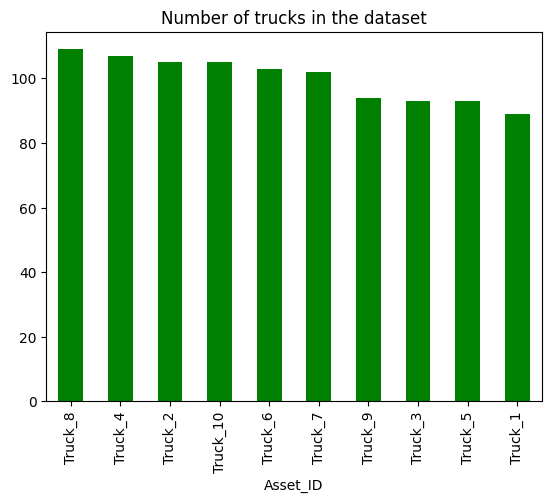

In [7]:
#how much trucks are we having
data1['Asset_ID'].value_counts().plot(kind='bar', title='Number of trucks in the dataset', color='green')

<Axes: title={'center': 'Inventory level distribution'}, ylabel='Frequency'>

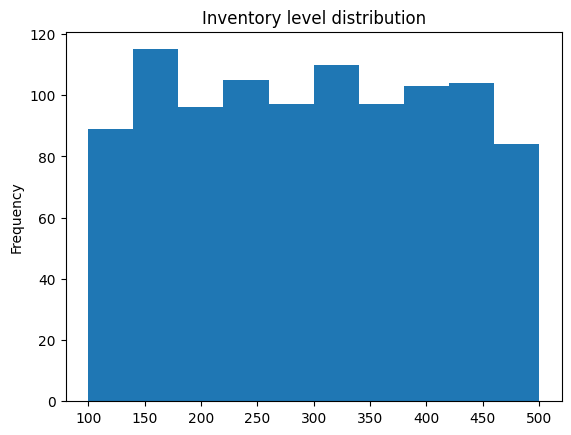

In [8]:
data1['Inventory_Level'].plot(kind='hist', title='Inventory level distribution')

<Axes: title={'center': 'Shipment Status'}, xlabel='Shipment_Status'>

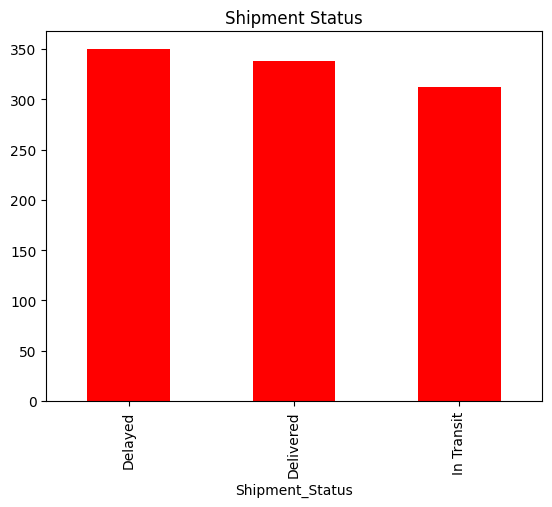

In [9]:
#Статус отгрузки
data1['Shipment_Status'].value_counts().plot(kind='bar', title='Shipment Status', color='red')

<Axes: title={'center': 'Temepature distribution'}, ylabel='Frequency'>

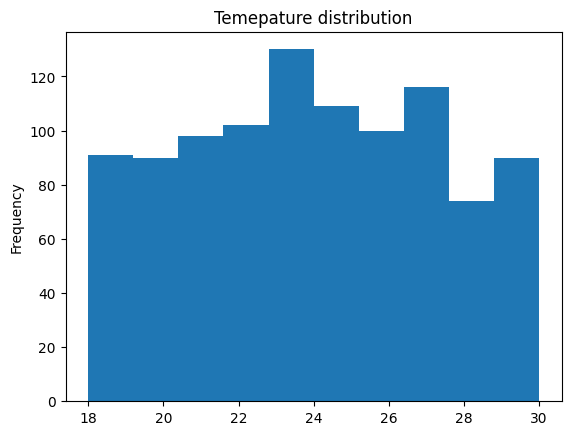

In [10]:
data1['Temperature'].plot(kind='hist', title='Temepature distribution')

In [19]:
#checking location column
data1.head(5)

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay,Location
0,2024-03-20 00:11:14,Truck_7,-65.7383,11.2497,390,Delayed,27.0,67.8,Detour,38,320,4,NaN,60.1,285,1,"Pearly Beach, South Africa"
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1,"Lompoc, United States"
2,2024-07-29 18:42:48,Truck_10,54.9232,79.5455,190,In Transit,25.2,62.2,Detour,34,355,3,NaN,99.2,260,0,"Ubinskoye, Russian Federation"
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1,"Murillo el Fruto, Spain"
4,2024-09-27 15:52:58,Truck_7,-65.8477,47.9468,480,Delayed,20.5,57.2,Clear,56,197,6,NaN,71.6,270,1,"Port-aux-Français, French Southern Territories"


<Axes: title={'center': 'Humidity distribution'}, ylabel='Frequency'>

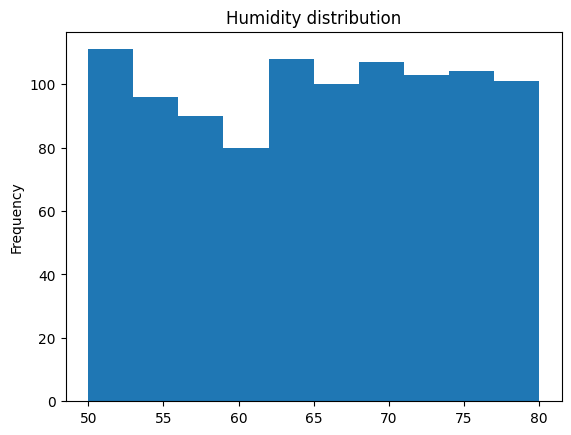

In [12]:
data1['Humidity'].plot(kind='hist', title='Humidity distribution')

<Axes: title={'center': 'Traffic status distribution'}, xlabel='Traffic_Status'>

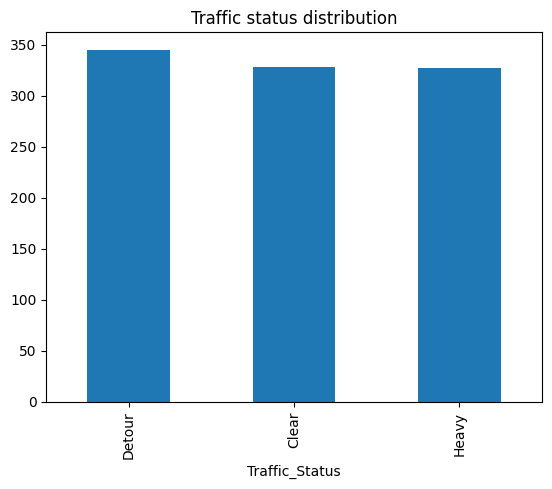

In [13]:
data1['Traffic_Status'].value_counts().plot(kind='bar', title='Traffic status distribution')

<Axes: title={'center': 'Waiting time distribution'}, xlabel='Время ожидания (мин)', ylabel='Кол-во ожидания в минутах'>

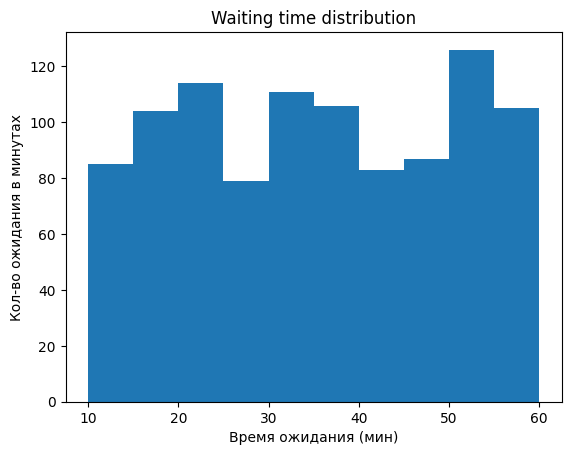

In [14]:
data1['Waiting_Time'].plot(kind='hist', title='Waiting time distribution', ylabel='Кол-во ожидания в минутах', xlabel='Время ожидания (мин)')

<Axes: title={'center': 'User Transaction Amount'}, ylabel='Frequency'>

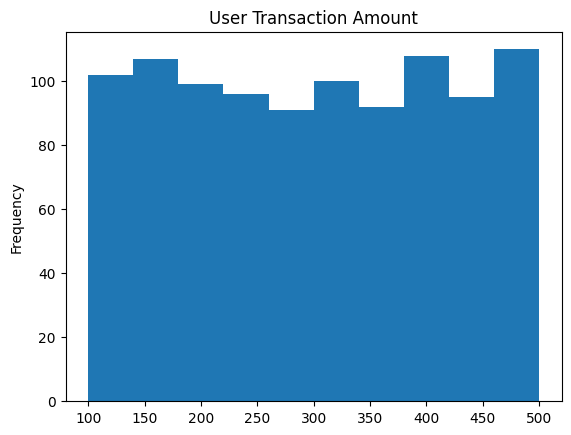

In [20]:
data1['User_Transaction_Amount'].plot(kind='hist', title='User Transaction Amount')

<Axes: title={'center': 'User Purchase Frequency'}, xlabel='User_Purchase_Frequency'>

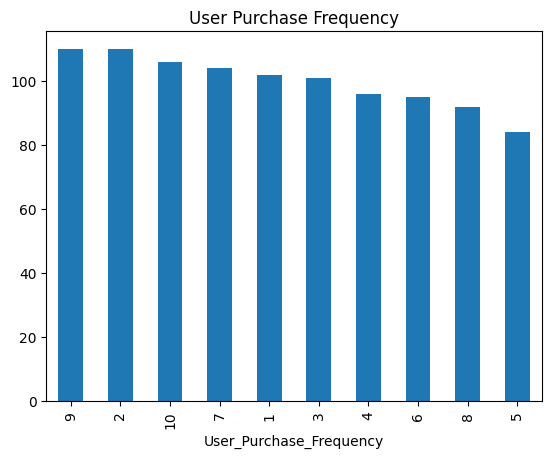

In [24]:
# data1.info()
data1['User_Purchase_Frequency'].value_counts().plot(kind='bar',title='User Purchase Frequency')

<Axes: title={'center': 'Logistics Delay Reason'}, xlabel='Logistics_Delay_Reason'>

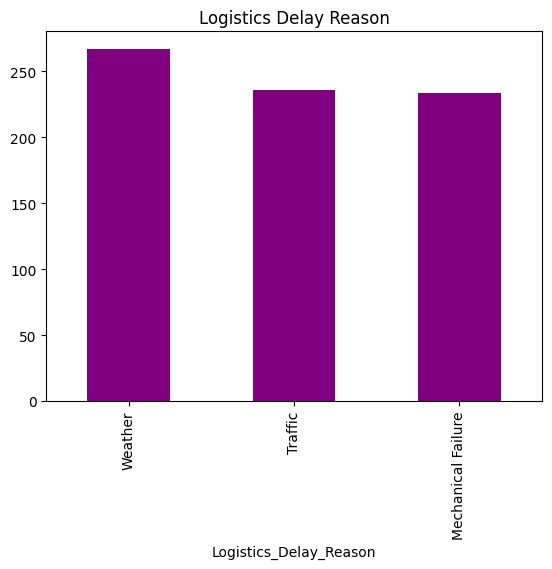

In [ ]:
# data1.info()
data1['Logistics_Delay_Reason'].value_counts().plot(kind='bar', title='Logistics Delay Reason', color='purple')

<Axes: title={'center': 'Asset Utilization'}, ylabel='Frequency'>

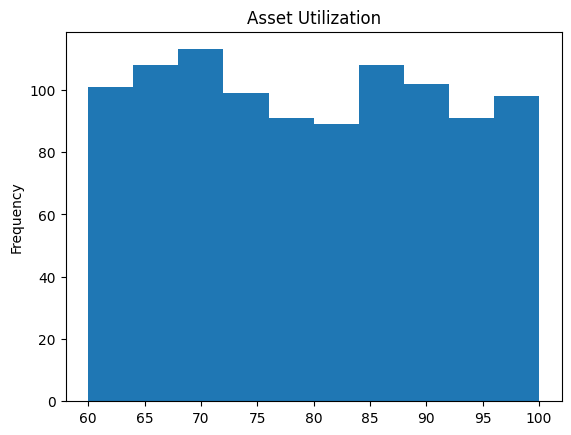

In [ ]:
data1['Asset_Utilization'].plot(kind='hist', title='Asset Utilization')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                1000 non-null   datetime64[ns]
 1   Asset_ID                 1000 non-null   object        
 2   Latitude                 1000 non-null   float64       
 3   Longitude                1000 non-null   float64       
 4   Inventory_Level          1000 non-null   int64         
 5   Shipment_Status          1000 non-null   object        
 6   Temperature              1000 non-null   float64       
 7   Humidity                 1000 non-null   float64       
 8   Traffic_Status           1000 non-null   object        
 9   Waiting_Time             1000 non-null   int64         
 10  User_Transaction_Amount  1000 non-null   int64         
 11  User_Purchase_Frequency  1000 non-null   int64         
 12  Logistics_Delay_Reason   737 non-nu

<Axes: title={'center': 'Demand Forecast'}, ylabel='Frequency'>

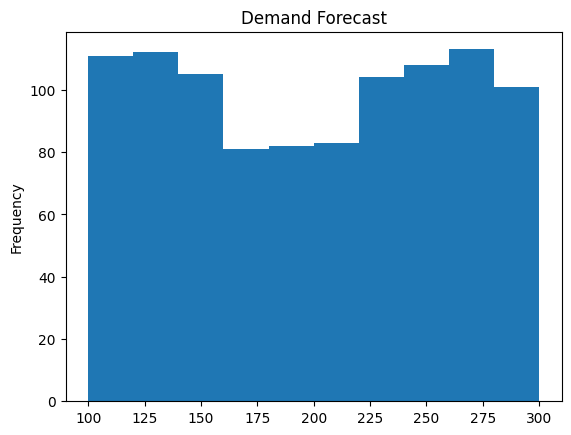

In [30]:
data1.info()
data1['Demand_Forecast'].plot(kind='hist', title='Demand Forecast')

In [ ]:
data1.info()

**Analyz**

In [31]:
data1[data1['Shipment_Status'] == 'Delayed'].groupby(['Asset_ID','Shipment_status'])['Shipment_Status'].count()

KeyError: 'Shipment_status'